In [2]:
import pandas as pd

In [2]:
pwd

'c:\\Users\\jsing378\\OneDrive - Johnson Controls\\Desktop\\NOTES\\MLOPS\\MLOPS_sunnysavita\\MLFLOW\\MLOPS_inaction\\experiment'

In [3]:
data=pd.read_csv("c:\\Users\\jsing378\\OneDrive - Johnson Controls\\Desktop\\NOTES\\MLOPS\\MLOPS_sunnysavita\\MLFLOW\\MLOPS_inaction\\cubic_zirconia.csv")

In [4]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [5]:
data["color"].value_counts()

color
G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: count, dtype: int64

In [6]:
data.isnull().sum()


Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [8]:
data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [9]:
# Drop columns with any NaN value
data = data.dropna(axis=1)


In [10]:
data.size #storage

269670

In [11]:
data.shape

(26967, 10)

In [12]:
data.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [13]:
data.drop(labels=["Unnamed: 0"], axis=1, inplace=True)

C:\Users\jsing378\AppData\Local\Temp\ipykernel_14420\3276215934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(labels=["Unnamed: 0"], axis=1, inplace=True)


In [14]:
data.duplicated().sum()

np.int64(38)

In [15]:
data=data.drop_duplicates()

In [16]:
data.duplicated().sum()

np.int64(0)

In [17]:
data.head()

,carat,cut,color,clarity,table,x,y,z,price
0,0.30,Ideal,E,SI1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,59.0,4.35,4.43,2.65,779


In [18]:
data.shape

(26929, 9)

In [19]:
cat_columns=data.columns[data.dtypes=="object"]

In [20]:
cat_columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [21]:
num_columns=data.columns[data.dtypes!="object"]

In [22]:
num_columns

Index(['carat', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [23]:
data[num_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26929.0,0.797978,0.477058,0.2,0.40,0.70,1.05,4.50
table,26929.0,57.456055,2.232283,49.0,56.00,57.00,59.00,79.00
x,26929.0,5.729362,1.127200,0.0,4.71,5.69,6.55,10.23
y,26929.0,5.733120,1.164886,0.0,4.72,5.70,6.54,58.90
z,26929.0,3.537763,0.719831,0.0,2.90,3.52,4.04,31.80
price,26929.0,3937.330573,4021.779695,326.0,945.00,2375.00,5356.00,18818.00


In [24]:
for col in cat_columns:
    
    print(data[col].value_counts())
    print(f"here is the total count:{len(data[col].value_counts())}")
    print("=======================")

cut
Ideal        10803
Premium       6885
Very Good     6027
Good          2435
Fair           779
Name: count, dtype: int64
here is the total count:5
color
G    5652
E    4916
F    4723
H    4093
D    3341
I    2764
J    1440
Name: count, dtype: int64
here is the total count:7
clarity
SI1     6565
VS2     6093
SI2     4563
VS1     4086
VVS2    2529
VVS1    1838
IF       891
I1       364
Name: count, dtype: int64
here is the total count:8


In [25]:
data[cat_columns]

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1
...,...,...,...
26962,Premium,G,SI1
26963,Ideal,H,IF
26964,Premium,E,VS2
26965,Very Good,F,VVS2


In [26]:
data[num_columns]

,carat,table,x,y,z,price
0,0.30,58.0,4.27,4.29,2.66,499
1,0.33,58.0,4.42,4.46,2.70,984
2,0.90,60.0,6.04,6.12,3.78,6289
3,0.42,56.0,4.82,4.80,2.96,1082
4,0.31,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...
26962,1.11,58.0,6.61,6.52,4.09,5408
26963,0.33,55.0,4.44,4.42,2.74,1114
26964,0.51,58.0,5.12,5.15,3.17,1656
26965,0.27,56.0,4.19,4.20,2.60,682


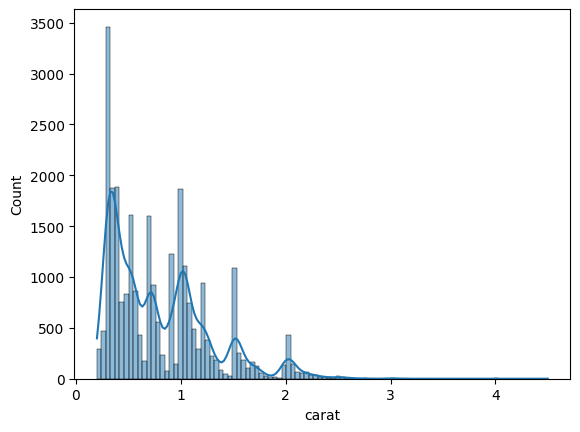

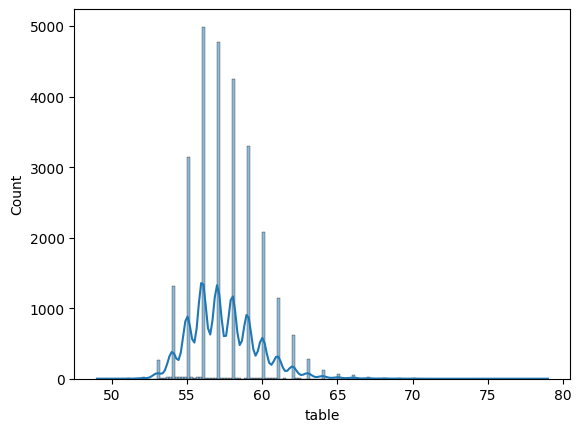

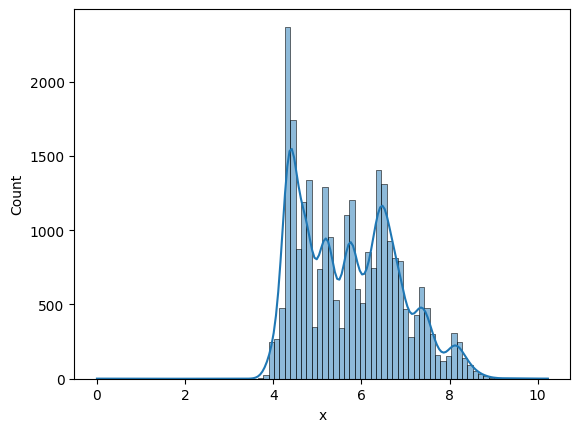

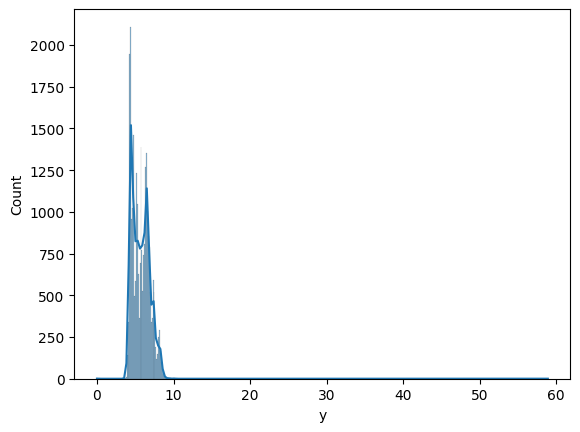

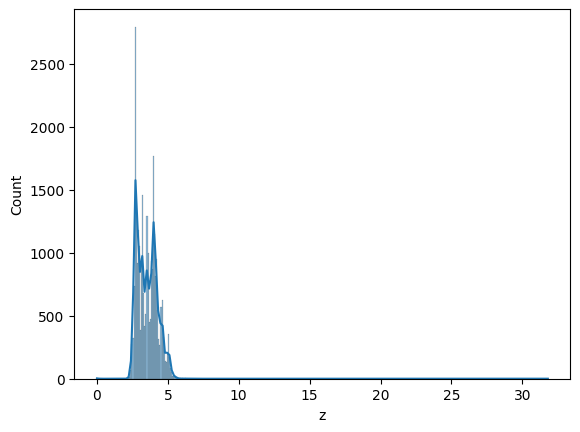

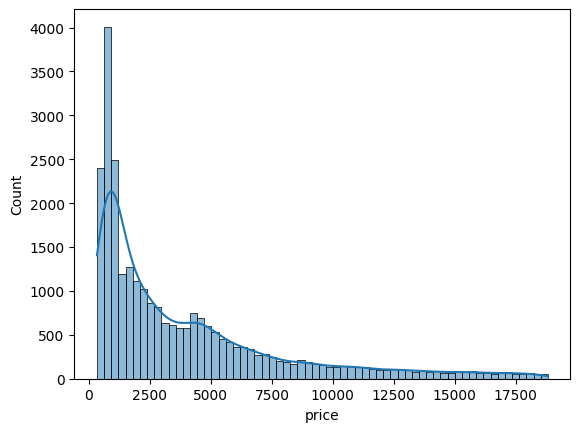

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
#plt.figure(figsize=(6,4 ))
for col in num_columns:
    sns.histplot(data=data, x=col, kde=True)
    plt.show()

<Axes: >

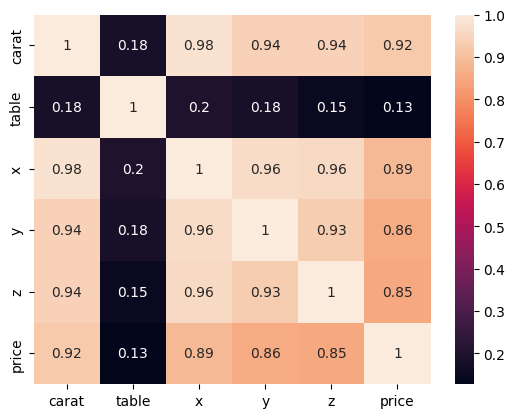

In [28]:

sns.heatmap(data[num_columns].corr(), annot=True)

In [29]:
for col in cat_columns:
    
    print(data[col].value_counts())
    print(f"here is the total count:{len(data[col].value_counts())}")
    print("=======================")

cut
Ideal        10803
Premium       6885
Very Good     6027
Good          2435
Fair           779
Name: count, dtype: int64
here is the total count:5
color
G    5652
E    4916
F    4723
H    4093
D    3341
I    2764
J    1440
Name: count, dtype: int64
here is the total count:7
clarity
SI1     6565
VS2     6093
SI2     4563
VS1     4086
VVS2    2529
VVS1    1838
IF       891
I1       364
Name: count, dtype: int64
here is the total count:8


In [30]:
data["clarity"].value_counts

<bound method IndexOpsMixin.value_counts of 0         SI1
1          IF
2        VVS2
3         VS1
4        VVS1
         ... 
26962     SI1
26963      IF
26964     VS2
26965    VVS2
26966     SI1
Name: clarity, Length: 26929, dtype: object>

In [31]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [32]:
# it is a oridinal encoding
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [33]:
data["color"].unique()

array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

In [34]:
# Applying the ordinal encoding
data["cut"]=data["cut"].map(cut_map)
data["clarity"]=data["clarity"].map(clarity_map)
data["color"]=data["color"].map(color_map)

In [35]:
data

,carat,cut,color,clarity,table,x,y,z,price
0,0.30,5,2,3,58.0,4.27,4.29,2.66,499
1,0.33,4,4,8,58.0,4.42,4.46,2.70,984
2,0.90,3,2,6,60.0,6.04,6.12,3.78,6289
3,0.42,5,3,5,56.0,4.82,4.80,2.96,1082
4,0.31,5,3,7,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...
26962,1.11,4,4,3,58.0,6.61,6.52,4.09,5408
26963,0.33,5,5,8,55.0,4.44,4.42,2.74,1114
26964,0.51,4,2,4,58.0,5.12,5.15,3.17,1656
26965,0.27,3,3,6,56.0,4.19,4.20,2.60,682


second method

In [91]:
data1=pd.read_csv("c:\\Users\\jsing378\\OneDrive - Johnson Controls\\Desktop\\NOTES\\MLOPS\\MLOPS_sunnysavita\\MLFLOW\\MLOPS_inaction\\cubic_zirconia.csv")



In [92]:
data1.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [93]:
data1=data1.drop_duplicates()

In [94]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [98]:
data1.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [101]:
X=data1.drop(labels=["Unnamed: 0","price"],axis=1)
y=data1["price"]
y

0         499
1         984
2        6289
3        1082
4         779
         ... 
26962    5408
26963    1114
26964    1656
26965     682
26966    5166
Name: price, Length: 26967, dtype: int64

In [103]:
type(X)

pandas.core.frame.DataFrame

In [104]:
cat_columns=X.columns[X.dtypes=="object"]
num_columns=X.columns[X.dtypes!="object"]

In [105]:
cat_columns, num_columns

(Index(['cut', 'color', 'clarity'], dtype='object'),
 Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object'))

In [56]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [106]:
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [107]:
num_pipeline=Pipeline(
    steps=[
        ("Imputer", SimpleImputer()),
         ("Scaler", StandardScaler())
         ]
    )

In [108]:
cat_pipeline=Pipeline(

    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("ordinalencoder",OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories]))

    ]
)

In [109]:
preprocessor=ColumnTransformer(

    [
        ("num_pipeline",num_pipeline,num_columns),
        ("cat_pipeline",cat_pipeline,cat_columns)
    ]
)

In [110]:
y=data1["price"]
X = data1.drop(columns="price") 

In [111]:
y

0         499
1         984
2        6289
3        1082
4         779
         ... 
26962    5408
26963    1114
26964    1656
26965     682
26966    5166
Name: price, Length: 26967, dtype: int64

In [112]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.30, random_state=42)

In [113]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18876, 10), (8091, 10), (18876,), (8091,))

In [114]:
X_train


,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
19040,19041,1.17,Good,D,SI2,60.4,65.0,6.81,6.77,4.10
396,397,1.20,Ideal,F,VVS1,61.1,55.0,6.86,6.89,4.20
15626,15627,0.31,Very Good,I,VVS2,61.6,59.0,4.31,4.33,2.66
16597,16598,2.19,Ideal,I,SI2,62.5,56.0,8.31,8.24,5.18
5811,5812,0.30,Ideal,H,VS2,62.1,57.0,4.27,4.30,2.66
...,...,...,...,...,...,...,...,...,...,...
21575,21576,0.41,Ideal,F,VS1,60.8,57.0,4.77,4.80,2.91
5390,5391,0.33,Very Good,H,VS1,59.7,59.0,4.52,4.53,2.70
860,861,0.39,Ideal,G,VVS1,NaN,56.0,4.66,4.70,2.90
15795,15796,0.33,Ideal,J,SI1,61.1,56.0,4.49,4.55,2.76


In [115]:
preprocessor.fit_transform(X_train)


array([[ 0.78796449, -0.96571264,  3.36584017, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.85115314, -0.4608357 , -1.09584537, ...,  4.        ,
         2.        ,  6.        ],
       [-1.02344341, -0.10020932,  0.68882884, ...,  2.        ,
         5.        ,  5.        ],
       ...,
       [-0.85494035,  0.        , -0.64967682, ...,  4.        ,
         3.        ,  6.        ],
       [-0.98131764, -0.4608357 , -0.64967682, ...,  4.        ,
         6.        ,  2.        ],
       [-1.02344341,  0.4767929 , -1.54201393, ...,  4.        ,
         1.        ,  3.        ]], shape=(18876, 9))

In [116]:
preprocessor.transform(X_test)


array([[ 0.64052431, -0.89358736,  1.1349974 , ...,  2.        ,
         2.        ,  2.        ],
       [-0.81281458,  1.27017095, -1.09584537, ...,  1.        ,
         1.        ,  1.        ],
       [-1.1498207 , -1.3984643 ,  0.68882884, ...,  3.        ,
         4.        ,  6.        ],
       ...,
       [ 1.69366844, -1.1099632 ,  0.24266029, ...,  3.        ,
         5.        ,  3.        ],
       [-0.56005999, -0.82146209, -0.20350827, ...,  4.        ,
         0.        ,  3.        ],
       [-1.00238053, -0.02808404, -1.09584537, ...,  4.        ,
         1.        ,  6.        ]], shape=(8091, 9))

In [117]:
preprocessor.get_feature_names_out()


array(['num_pipeline__carat', 'num_pipeline__depth',
       'num_pipeline__table', 'num_pipeline__x', 'num_pipeline__y',
       'num_pipeline__z', 'cat_pipeline__cut', 'cat_pipeline__color',
       'cat_pipeline__clarity'], dtype=object)

In [118]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [119]:
X_train

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,0.787964,-0.965713,3.365840,0.964420,0.934381,0.813401,1.0,0.0,1.0
1,0.851153,-0.460836,-1.095845,1.008892,1.041947,0.957195,4.0,2.0,6.0
2,-1.023443,-0.100209,0.688829,-1.259163,-1.252793,-1.257232,2.0,5.0,5.0
3,2.936379,0.548918,-0.649677,2.298570,2.252064,2.366376,4.0,5.0,1.0
4,-1.044506,0.260417,-0.203508,-1.294740,-1.279684,-1.257232,4.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...
18871,-0.812815,-0.677212,-0.203508,-0.850024,-0.831493,-0.897747,4.0,2.0,4.0
18872,-0.981318,-1.470590,0.688829,-1.072382,-1.073516,-1.199714,2.0,4.0,4.0
18873,-0.854940,0.000000,-0.649677,-0.947861,-0.921131,-0.912126,4.0,3.0,6.0
18874,-0.981318,-0.460836,-0.649677,-1.099065,-1.055588,-1.113438,4.0,6.0,2.0


In [120]:
X_test

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,0.640524,-0.893587,1.134997,0.822111,0.844743,0.712745,2.0,2.0,2.0
1,-0.812815,1.270171,-1.095845,-0.921178,-0.894240,-0.782712,1.0,1.0,1.0
2,-1.149821,-1.398464,0.688829,-1.472627,-1.467924,-1.573579,3.0,4.0,6.0
3,1.525165,0.765294,-0.649677,1.418031,1.409464,1.517991,4.0,4.0,5.0
4,-0.791752,0.260417,-1.095845,-0.841129,-0.822529,-0.797091,4.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...
8086,-1.044506,-1.254214,1.134997,-1.241374,-1.279684,-1.357888,3.0,3.0,4.0
8087,-1.023443,-0.172335,-0.649677,-1.205797,-1.234865,-1.228473,4.0,4.0,5.0
8088,1.693668,-1.109963,0.242660,1.693755,1.642523,1.489233,3.0,5.0,3.0
8089,-0.560060,-0.821462,-0.203508,-0.431990,-0.401229,-0.495124,4.0,0.0,3.0


Model Training

In [124]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [127]:
models={

    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'Randomforest':RandomForestRegressor(),
    'xgboost':XGBRegressor()

}

In [128]:
trained_model_list=[]
model_list=[]
r2_list=[]

In [129]:
list(models)


['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet', 'Randomforest', 'xgboost']

In [131]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    print(model)
    

LinearRegression()
Lasso()
Ridge()
ElasticNet()
RandomForestRegressor()
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [133]:
models.keys()

dict_keys(['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet', 'Randomforest', 'xgboost'])

In [134]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    print(model)
    

LinearRegression()
Lasso()
Ridge()
ElasticNet()
RandomForestRegressor()
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [135]:
def evaluate_model(true,pred):
    r2=r2_score(true,pred)
    mae=mean_absolute_error(true,pred)
    mse=mean_squared_error(true,pred)

    return mae, mse,r2

In [136]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    
    model.fit(X_train,y_train)

    #make_prediction
    y_pred=model.predict(X_test)

    #this is for the validaiton
    MAE,MSE,R2=evaluate_model(y_test,y_pred)


    print("model training performance",model)
    print("MSE:", MSE)
    print("MAE:",MAE)
    print("R2 SCORE:",R2)

    r2_list.append(R2)

    print("="*40)
    print("\n")

    

model training performance LinearRegression()
MSE: 2518489.565802648
MAE: 835.8816985465158
R2 SCORE: 0.8478461311276582




c:\Users\jsing378\OneDrive - Johnson Controls\Desktop\NOTES\MLOPS\MLOPS_sunnysavita\MLFLOW\MLOPS_inaction\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.557e+08, tolerance: 3.029e+07
  model = cd_fast.enet_coordinate_descent(


model training performance Lasso()
MSE: 1870799.8230695894
MAE: 830.8083544424316
R2 SCORE: 0.8869761325078144


model training performance Ridge()
MSE: 2438540.2268794742
MAE: 835.4762963128268
R2 SCORE: 0.8526762489078246


model training performance ElasticNet()
MSE: 2819590.6428738087
MAE: 1082.685500624624
R2 SCORE: 0.829655190644883


model training performance RandomForestRegressor()
MSE: 318125.03411313746
MAE: 285.07326662488003
R2 SCORE: 0.9807805617371962


model training performance XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_

In [137]:
r2_list

[0.8478461311276582,
 0.8869761325078144,
 0.8526762489078246,
 0.829655190644883,
 0.9807805617371962,
 0.9804626703262329]

In [138]:
import logging
import os
from datetime import datetime

In [140]:
LOG_FILE=f"{datetime.now().strftime('%m_%d_%Y_%H_%M_%S')}.log"

log_path=os.path.join(os.getcwd(),"logs")

os.makedirs(log_path,exist_ok=True)

LOG_FILEPATH=os.path.join(log_path,LOG_FILE)

In [141]:
LOG_FILEPATH


'c:\\Users\\jsing378\\OneDrive - Johnson Controls\\Desktop\\NOTES\\MLOPS\\MLOPS_sunnysavita\\MLFLOW\\MLOPS_inaction\\experiment\\logs\\12_23_2024_23_12_13.log'

In [145]:
logging.basicConfig(level=logging.INFO, 
                    filename=LOG_FILEPATH,
                    format="[%(asctime)s] %(lineno)d %(name)s - %(levelname)s - %(message)s"
                    
)

In [146]:
logging.info("this is my next log")
